In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

tcp_complete = pd.read_csv("../data/captura_prueba_MULTIPLESVPN_20180205_12h/tagger_results/tcp_complete_tagged_ok", delimiter=r"\s+",low_memory=False)

print("-------------> Original Dataset -- Features: " + str(len(tcp_complete.columns))+ " Traffic Flows: " + str(len(tcp_complete.index)))
print(tcp_complete.head())

# Mark vpn flows
vpn_ip = ['138.100.156.254','138.100.156.244','138.100.156.253']
tcp_complete['is_vpn'] = tcp_complete['s_ip:15'].isin(vpn_ip)

# Filter bad features
bad_features = [1, 2, 12, 15, 16, 18, 29, 30, 38, 39, 40, 41, 43, 50, 51, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 74, 75, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 92, 97, 98, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
bad_features = [index - 1 for index in bad_features]
tcp_complete = tcp_complete.drop(tcp_complete.columns[bad_features], axis =1)


print("-------------> Filtered Dataset -- Features: " + str(len(tcp_complete.columns))+ " Traffic Flows: " + str(len(tcp_complete.index)))
print(tcp_complete.head())

-------------> Original Dataset -- Features: 132 Traffic Flows: 147944
        #c_ip:1  c_port:2  c_pkts_all:3  c_rst_cnt:4  c_ack_cnt:5  \
0  172.16.1.172     41342            12            0           11   
1  172.16.1.175     49845            42            0           41   
2  172.16.1.175     52472             7            0            6   
3  172.16.1.175     48903            16            0           15   
4  172.16.1.175     40561            30            0           29   

   c_ack_cnt_p:6  c_bytes_uniq:7  c_pkts_data:8  c_bytes_all:9  \
0              6            2409              4           2409   
1             38             637              2            637   
2              3             299              1            299   
3             13             335              1            335   
4             25             790              3            790   

   c_pkts_retx:10   ...     c_appdataT:123  s_appdataT:124  c_appdataB:125  \
0               0   ...            463.

In [2]:
print(tcp_complete.describe())

        c_pkts_all:3    c_rst_cnt:4    c_ack_cnt:5  c_ack_cnt_p:6  \
count  147944.000000  147944.000000  147944.000000  147944.000000   
mean       46.999885       0.118727      45.710607      26.311604   
std       522.451596       0.323469     522.452174      99.311170   
min         2.000000       0.000000       0.000000       0.000000   
25%        10.000000       0.000000       9.000000       6.000000   
50%        16.000000       0.000000      14.000000       9.000000   
75%        37.000000       0.000000      36.000000      29.000000   
max     97372.000000       1.000000   97371.000000   21344.000000   

       c_bytes_uniq:7  c_pkts_data:8  c_bytes_all:9  c_pkts_retx:10  \
count    1.479440e+05  147944.000000   1.479440e+05   147944.000000   
mean     2.194909e+04      18.010031   2.590553e+04        3.886511   
std      7.218297e+05     441.782528   8.267836e+05       77.145025   
min      0.000000e+00       0.000000   0.000000e+00        0.000000   
25%      3.640000e+02  

In [3]:
correlations = tcp_complete.corr()
print(correlations)

                 c_pkts_all:3  c_rst_cnt:4  c_ack_cnt:5  c_ack_cnt_p:6  \
c_pkts_all:3         1.000000     0.034549     0.999999       0.844883   
c_rst_cnt:4          0.034549     1.000000     0.034055       0.044897   
c_ack_cnt:5          0.999999     0.034055     1.000000       0.844870   
c_ack_cnt_p:6        0.844883     0.044897     0.844870       1.000000   
c_bytes_uniq:7       0.989753     0.026946     0.989757       0.790468   
c_pkts_data:8        0.992719     0.030138     0.992723       0.774304   
c_bytes_all:9        0.992234     0.027520     0.992237       0.786833   
c_pkts_retx:10       0.963078     0.031047     0.963074       0.728817   
c_bytes_retx:11      0.962919     0.030022     0.962923       0.726832   
c_syn_cnt:13        -0.003719     0.018662    -0.004702      -0.013164   
c_fin_cnt:14        -0.035416    -0.074029    -0.035497       0.023049   
s_pkts_all:17        0.994230     0.037007     0.994230       0.872815   
s_ack_cnt:19         0.994230     0.03

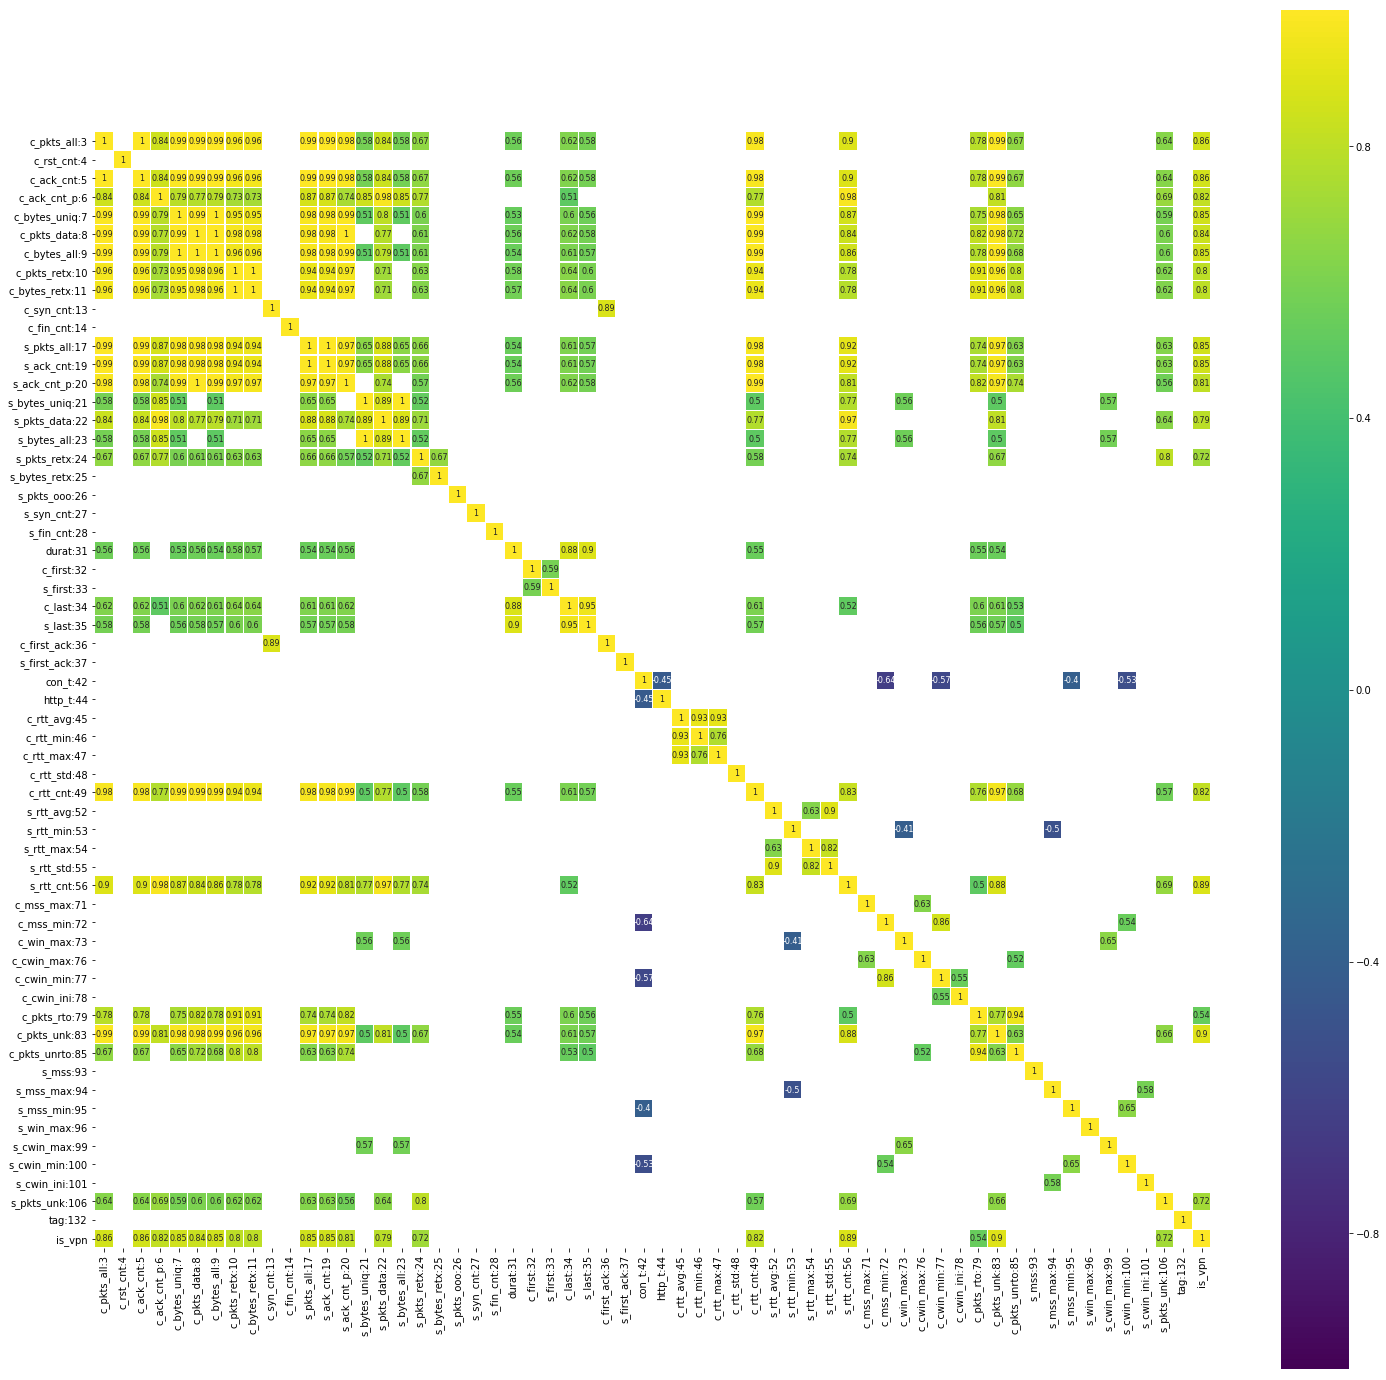

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
sns.heatmap(correlations[(correlations >= 0.5) | (correlations <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


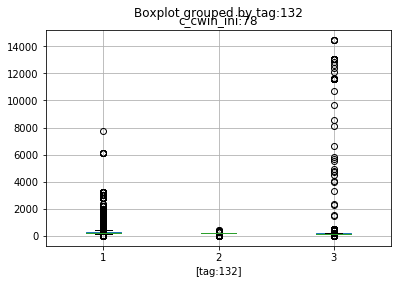

In [6]:

import seaborn as sns

plt.figure(figsize = (10, 6))
ax = tcp_complete.boxplot(column=['c_cwin_ini:78'],by=['tag:132'])


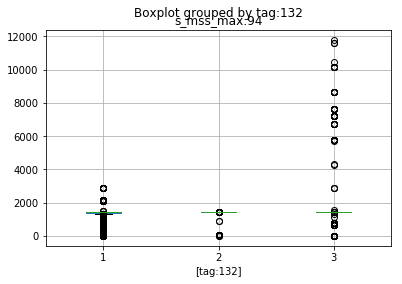

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
ax = tcp_complete.boxplot(column=['s_mss_max:94'],by=['tag:132'])


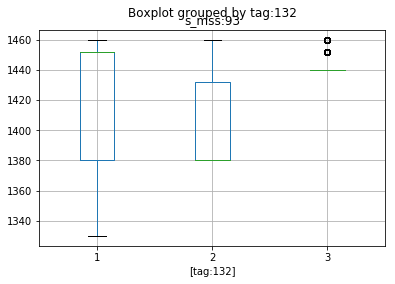

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
ax = tcp_complete.boxplot(column=['s_mss:93'],by=['tag:132'])


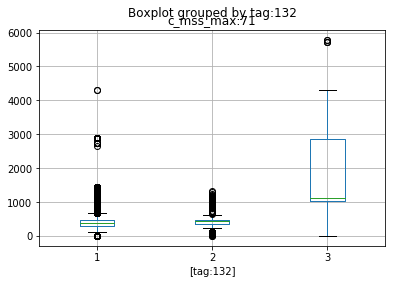

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
ax = tcp_complete.boxplot(column=['c_mss_max:71'],by=['tag:132'])


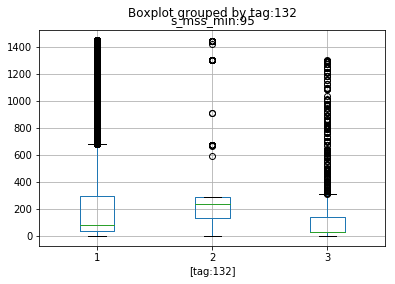

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
ax = tcp_complete.boxplot(column=['s_mss_min:95'],by=['tag:132'])

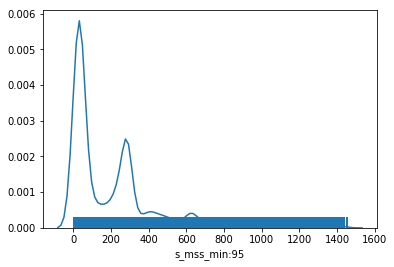

In [ ]:
sns.distplot(tcp_complete['s_mss_min:95'], hist=False, rug=True);

In [ ]:
sns.distplot(tcp_complete['tag:132'], hist=False, rug=True);

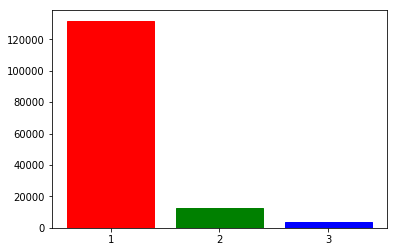

In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots()

bins_count = np.bincount(tcp_complete['tag:132'])[1:]
x = np.arange(3)

barlist = plt.bar(x,bins_count)
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')


plt.xticks(x, ('1', '2', '3'))
plt.show()